In [16]:
import pandas as pd
dataset = pd.read_csv('./dataset_halfSecondWindow.csv')

In [17]:
dataset

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,62580,82695,4066.0,NaN,51.0,10.105329,10.089159,10.135641,0.026270,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,62581,77608,604.0,NaN,100.0,9.544118,9.544118,9.544118,14.491194,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,62582,85219,1341.0,NaN,100.0,14.258467,14.258467,14.258467,0.829544,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,62583,69368,1186.0,NaN,90.0,10.726491,10.726491,10.726491,7.089701,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


In [24]:
import matplotlib.pyplot as plt

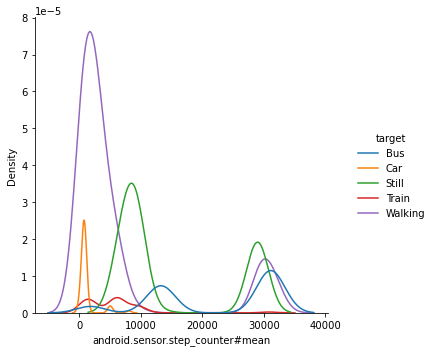

In [32]:
import seaborn as sns
sns.displot(dataset, x="android.sensor.step_counter#mean", hue="target", kind="kde")

In [35]:
(dataset["android.sensor.step_counter#mean"]==dataset["android.sensor.step_counter#max"]).sum()

15123

In [45]:
dataset['step_counter']=dataset["android.sensor.step_counter#mean"]/dataset["time"]

In [49]:
dataset[(dataset['step_counter']>-1000)&(dataset['step_counter']<1000)].shape

(15476, 72)

In [50]:
dataset.shape

(62585, 72)

In [56]:
62585-15476

47109

In [55]:
dataset.isnull().sum()

Unnamed: 0                   0
id                           0
time                         0
activityrecognition#0    62585
activityrecognition#1        0
                         ...  
speed#max                25920
speed#std                60894
target                       0
user                         0
step_counter             46974
Length: 72, dtype: int64

<AxesSubplot:xlabel='target', ylabel='sound#mean'>

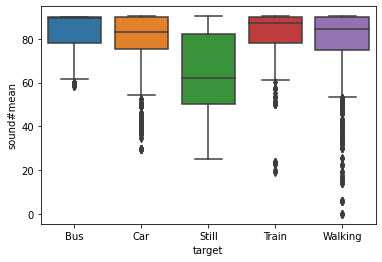

In [184]:
sns.boxplot(x="target", y="sound#mean", data=dataset)

In [181]:
dataset['var'] = dataset['android.sensor.pressure#max']/dataset["time"]

(-5000.0, 5000.0)

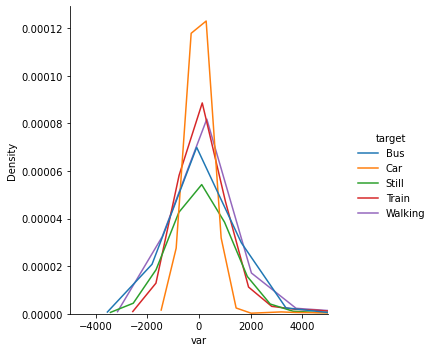

In [220]:
sns.displot(dataset, x="var", hue="target", kind="kde")
plt.xlim(-5000,5000)

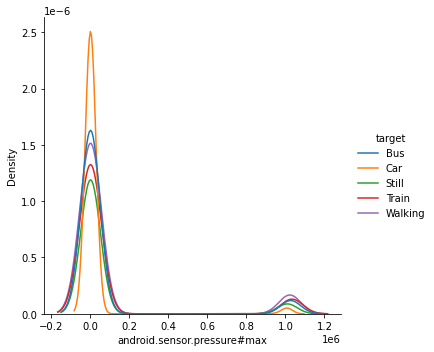

In [180]:
sns.displot(dataset, x="android.sensor.pressure#max", hue="target", kind="kde")
#plt.xlim(-20,20)

In [174]:
(dataset[dataset['target']=='Bus']['var']).median()

3.463178121426117

In [176]:
(dataset[dataset['target']=='Bus']['android.sensor.pressure#mean']).mean()

54843.629482901095

In [178]:
(dataset['android.sensor.pressure#mean']/dataset['time']).mean()

254.5400468668001

In [179]:
(dataset['android.sensor.pressure#max']-dataset['android.sensor.pressure#min']).max()

1036804.1743

In [164]:
dataset[['time','var','android.sensor.proximity#mean','android.sensor.proximity#min','android.sensor.proximity#max','android.sensor.proximity#std']].corr()

,time,var,android.sensor.proximity#mean,android.sensor.proximity#min,android.sensor.proximity#max,android.sensor.proximity#std
time,1.000000,-0.048605,-0.020230,-0.018447,-0.021982,0.367511
var,-0.048605,1.000000,0.010805,0.011381,0.010007,-0.026224
android.sensor.proximity#mean,-0.020230,0.010805,1.000000,0.999562,0.999565,-0.206326
android.sensor.proximity#min,-0.018447,0.011381,0.999562,1.000000,0.998255,-0.280121
android.sensor.proximity#max,-0.021982,0.010007,0.999565,0.998255,1.000000,-0.124858
android.sensor.proximity#std,0.367511,-0.026224,-0.206326,-0.280121,-0.124858,1.000000


In [185]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                31292.000000
id                       131007.000000
time                       1204.000000
activityrecognition#0              NaN
activityrecognition#1         8.000000
                             ...      
step_counter                 15.181834
rotation                      0.002122
speed                         0.017978
var                           4.949016
step_counter_2              111.855000
Length: 74, dtype: float64


In [197]:
print(((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))))

       Unnamed: 0  activityrecognition#0  activityrecognition#1  \
0           False                  False                   True   
1           False                  False                   True   
2           False                  False                   True   
3           False                  False                   True   
4           False                  False                   True   
...           ...                    ...                    ...   
62580       False                  False                   True   
62581       False                  False                  False   
62582       False                  False                  False   
62583       False                  False                  False   
62584       False                  False                  False   

       android.sensor.accelerometer#max  android.sensor.accelerometer#mean  \
0                                  True                              False   
1                                  True

In [206]:
dataset.iloc[0,-5]=1.499262
dataset

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,speed#min,speed#max,speed#std,target,user,step_counter,rotation,speed,var,step_counter_2
0,0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,...,NaN,NaN,NaN,Bus,U12,1.499262,0.183960,NaN,336.546957,18.09
1,1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,...,NaN,NaN,NaN,Bus,U12,452.250000,0.235840,NaN,252.411133,18.09
2,2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,...,NaN,NaN,NaN,Bus,U12,361.800000,0.188776,NaN,201.921440,18.09
3,3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,...,NaN,NaN,NaN,Bus,U12,301.500000,0.151960,NaN,168.260010,18.09
4,4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,...,NaN,NaN,NaN,Bus,U12,258.428571,0.132316,NaN,144.224434,18.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,62580,82695,4066.0,NaN,51.0,10.105329,10.089159,10.135641,0.026270,0.834765,...,0.00,0.00,NaN,Walking,U1,1.499262,0.000206,0.000000,NaN,60.96
62581,62581,77608,604.0,NaN,100.0,9.544118,9.544118,9.544118,14.491194,0.965309,...,1.50,1.50,NaN,Walking,U1,3.882450,0.001623,0.002483,NaN,23.45
62582,62582,85219,1341.0,NaN,100.0,14.258467,14.258467,14.258467,0.829544,0.773370,...,0.00,0.00,NaN,Walking,U1,0.901566,0.000729,0.000000,NaN,12.09
62583,62583,69368,1186.0,NaN,90.0,10.726491,10.726491,10.726491,7.089701,0.789832,...,1.00,1.00,NaN,Walking,U1,0.989882,0.000664,0.000843,NaN,11.74


In [207]:
dataset[((dataset > (Q1 - 1.5 * IQR)) & (dataset < (Q3 + 1.5 * IQR)))]

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,speed#min,speed#max,speed#std,target,user,step_counter,rotation,speed,var,step_counter_2
0,0,156661,3.0,NaN,NaN,10.053802,NaN,NaN,NaN,0.629076,...,NaN,NaN,NaN,NaN,NaN,1.499262,NaN,NaN,NaN,18.09
1,1,156662,4.0,NaN,NaN,10.687402,NaN,NaN,NaN,0.577839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.09
2,2,156663,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.651511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.09
3,3,156664,6.0,NaN,NaN,9.401312,NaN,NaN,1.572354,0.713226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.09
4,4,156665,7.0,NaN,NaN,10.389851,NaN,NaN,NaN,0.707375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,62580,82695,NaN,NaN,NaN,10.105329,10.089159,10.135641,0.026270,0.834765,...,0.00,0.00,NaN,NaN,NaN,1.499262,0.000206,0.000000,NaN,60.96
62581,62581,77608,604.0,NaN,100.0,9.544118,9.544118,9.544118,NaN,0.965309,...,1.50,1.50,NaN,NaN,NaN,3.882450,0.001623,0.002483,NaN,23.45
62582,62582,85219,1341.0,NaN,100.0,NaN,NaN,NaN,0.829544,0.773370,...,0.00,0.00,NaN,NaN,NaN,0.901566,0.000729,0.000000,NaN,12.09
62583,62583,69368,1186.0,NaN,90.0,10.726491,10.726491,10.726491,NaN,0.789832,...,1.00,1.00,NaN,NaN,NaN,0.989882,0.000664,0.000843,NaN,11.74


In [215]:
data_prev = dataset.iloc[:,5:-7]
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data_prev

Unnamed: 0                31292.000000
id                       131007.000000
time                       1204.000000
activityrecognition#0              NaN
activityrecognition#1         8.000000
                             ...      
step_counter                 15.174945
rotation                      0.002122
speed                         0.017978
var                           4.949016
step_counter_2              111.855000
Length: 74, dtype: float64


,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#min,...,android.sensor.step_counter#max,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std
0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,9.806645,9.806636,...,1809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,0.079211,9.806640,9.806629,...,1809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,0.033566,9.806636,9.806620,...,1809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,0.014745,9.806635,9.806622,...,1809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,0.018754,9.806633,9.806622,...,1809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,0.834765,0.000162,9.806650,9.806650,...,6096.0,NaN,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN
62581,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,0.965309,0.012192,9.806650,9.806650,...,2345.0,NaN,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN
62582,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,0.773370,0.014168,9.806650,9.806650,...,1209.0,NaN,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN
62583,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,0.789832,0.005423,9.806650,9.806650,...,1174.0,NaN,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN


In [216]:
data_out = data_prev[~((data_prev < (Q1 - 1.5 * IQR)) |(data_prev > (Q3 + 1.5 * IQR))).any(axis=1)]

In [217]:
data_out

,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#min,...,android.sensor.step_counter#max,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std
175,9.906024,8.901191,10.895072,0.599420,0.379235,0.371547,0.384560,0.004185,9.806649,9.806647,...,13877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,9.824852,8.304215,10.767359,0.616764,0.365104,0.358830,0.372244,0.003708,9.806649,9.806648,...,13877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,9.680814,8.345407,10.813159,0.637707,0.372913,0.369911,0.377025,0.002305,9.806649,9.806648,...,13877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,9.843525,8.700686,11.155148,0.663187,0.372820,0.370902,0.375091,0.001220,9.806649,9.806648,...,13877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,9.975566,8.341675,10.882271,0.438962,0.396157,0.388433,0.402168,0.003853,9.806649,9.806647,...,13877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62491,10.171784,10.171784,10.171784,0.012068,0.835752,0.835752,0.835752,0.000013,9.806650,9.806650,...,6096.0,NaN,89.767065,89.767065,89.767065,NaN,0.0,0.0,0.0,NaN
62502,10.093908,10.082507,10.105310,0.016124,0.731067,0.731067,0.731067,0.000329,9.806650,9.806650,...,6096.0,NaN,89.755772,89.755772,89.755772,NaN,0.0,0.0,0.0,NaN
62543,9.936942,9.936942,9.936942,0.294486,0.707754,0.707754,0.707754,0.000348,9.806650,9.806650,...,6096.0,NaN,89.783695,89.783695,89.783695,NaN,0.0,0.0,0.0,NaN
62560,9.507824,9.507824,9.507824,1.523777,0.997610,0.997610,0.997610,0.000062,9.806650,9.806650,...,901.0,NaN,89.667181,89.667181,89.667181,NaN,1.0,1.0,1.0,NaN


In [218]:
data_out.isnull().sum()

android.sensor.accelerometer#mean               0
android.sensor.accelerometer#min                0
android.sensor.accelerometer#max                0
android.sensor.accelerometer#std                0
android.sensor.game_rotation_vector#mean     2789
                                            ...  
sound#std                                   15844
speed#mean                                   9868
speed#min                                    9868
speed#max                                    9868
speed#std                                   16590
Length: 64, dtype: int64